# Introduction to ML libraries

- Pandas : Used for data manipulation in the form of data frames
- Scikit learn: used for model training, splitting data and evaluation of model
- Matplotlib: used for data visualization
- Seaborn: Used for data visualization
- Numpy: numerical and matrix operations

Note install all the libraries using '!pip install pandas numpy seaborn matplotlib scikit-learn' if this is your first time

All datasets have been downloaded from https://archive.ics.uci.edu/datasets (UCI)

## Data preprocessing

Data Preprocessing converts raw data into well formatted data suitable for training a machine learning model. It handles missing values and noise and outliers, scales the data and converts categorical data into numerical data as well as involves selecting the best features for training a model.

### Steps involved in data preprocessing
1. Cleaning data
    - Handling missing or duplicated data
    - Handling outliers and noise
2. Data transformation
    - Normalization and standardization
    - Encoding categorical Data
3. Feature engineering
    - Using data visualization to understand correlation and select features
    - using methods like PCA for feature engineering
4. Data splitting
    - Validation set
    - Training set
5. Sampling
    - Sampling for different training (mini-batch training)

In [1]:
import numpy as np
import pandas as pd

Download the dataset from https://archive.ics.uci.edu/dataset/2/adult extract and only save the adult.data file in the same directory as this jupyter notebook

In [2]:
df=pd.read_csv('adult.csv')

## Pandas

Before starting preprocessing it is necessary to understand the data, for this we can use pandas command. Now that the data is loaded into 'df' using read_csv which is a pandas function we can view the various attributes of df

- df.head() -> to view the first 5 rows of the dataset
- df.info() -> to check the datatype of each column
- df.describe() -> to check mean median and other information of each column
- df.shape -> to check the number of examples (rows) and features (columns)
- df.sample(n) -> to view random n rows in the dataset

In [3]:
df.shape

(48842, 15)

Indicates the dataset has 48842 rows and 15 columns

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


indicates the dataset has mostly 'object' type values i.e categorical values as viewable in the first 5 rows

In [6]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


This information can be valueable in detecting outliers

In [7]:
df.sample(n=5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
33103,47,Private,146497,Some-college,10,Separated,Adm-clerical,Unmarried,White,Female,0,0,16,Germany,<=50K
928,39,Self-emp-not-inc,41017,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,<=50K
26005,26,Private,176520,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,53,United-States,<=50K
35250,37,Private,335716,HS-grad,9,Divorced,Sales,Unmarried,White,Female,0,0,40,United-States,<=50K
41328,47,Private,104068,HS-grad,9,Divorced,Prof-specialty,Unmarried,Amer-Indian-Eskimo,Female,0,0,40,United-States,<=50K


## Finding Missing and duplicated values

You can find missing values for each column using
- df.isna().sum()

Similarily for duplicated values
- df.duplicated.sum()

also if in the dataset missing values has a specific representation like '?' use
- df.isin(['?']).sum()

In [8]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
df.duplicated().sum()

52

we have 52 duplicated values

In [10]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

the data has missing values represented as '?' thus we will have to switch '?' to NA

In [11]:
df = df.replace('?',np.nan)

now all the '?' values are converted into na values

In [12]:
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

## Handling Missing Values

- drop the rows
- forward fill or backward fill for ordinal or time series data
- imputation
    - mean
    - median
    - constant value

First for the duplicated values, we will drop all the rows using
- df.drop_duplicates()

In [13]:
df=df.drop_duplicates()
df.duplicated().sum()

0

Now for imputation using SimpleImputer from sklearn.impute we use the most_frequent strategy to impute the data resepctively in all columns. first the imputer is fitted onto the data and a numpy array is formed (stored in imputed_data) then the array is converted to a pandas dataframe

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int']).columns.tolist()

print(categorical_features)
print(numerical_features)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


In [16]:
imputer = SimpleImputer(strategy='most_frequent')
imputed_data = imputer.fit_transform(df)
df = pd.DataFrame(imputed_data, columns=df.columns)

In [17]:
df.sample(n=25)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
15852,57,Private,123632,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Black,Female,0,0,35,United-States,<=50K
48563,37,Self-emp-inc,328466,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
29586,33,Private,388741,Some-college,10,Never-married,Adm-clerical,Unmarried,Other,Female,0,0,38,United-States,<=50K
24652,31,State-gov,188900,Assoc-acdm,12,Never-married,Adm-clerical,Not-in-family,White,Female,3325,0,35,United-States,<=50K
42879,35,Federal-gov,49657,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,7298,0,40,United-States,>50K
10044,62,Self-emp-not-inc,271464,Masters,14,Separated,Farming-fishing,Not-in-family,White,Male,0,0,30,United-States,<=50K
6327,57,State-gov,132145,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,7298,0,45,United-States,>50K
34279,22,Private,222490,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K
48236,24,Private,223515,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
40816,28,Private,373698,12th,8,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,<=50K


In [18]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Thus all the missing values have been dealt with

## Finding Outliers and noise

There are multiple ways to find outliers
- visualisation of the distribution of data using
    - boxplots
    - histograms
    - scatterplots
- interquartile range
- standard deviation or zscore

Further to handle outliers, they can either be removed or imputed


Since outliers are only possible in numerical data. We need to first divide the columns in numerical and categorical

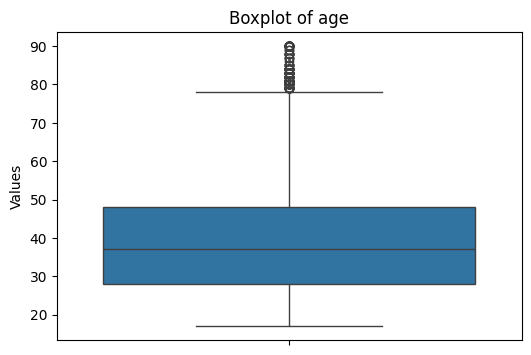

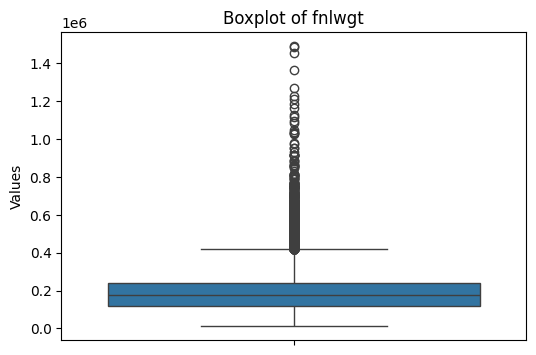

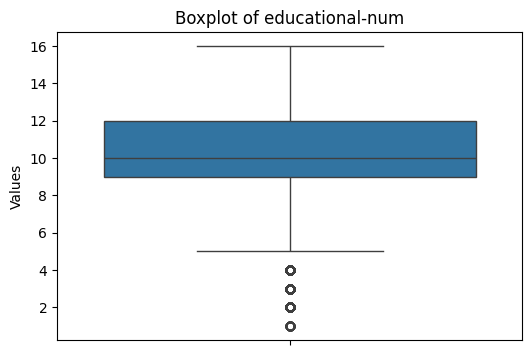

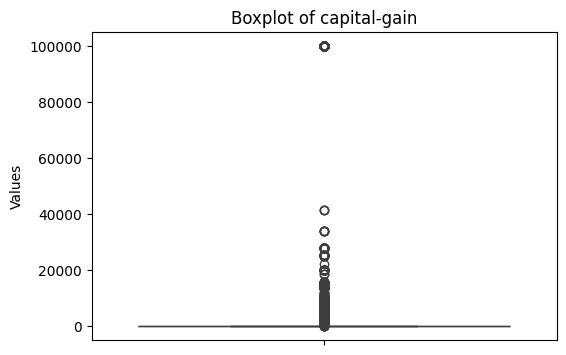

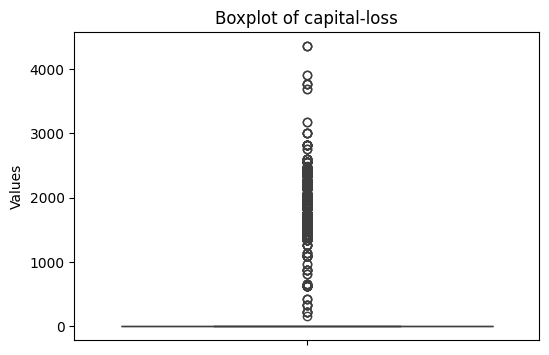

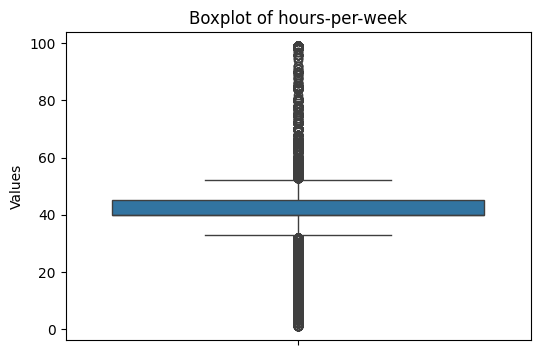

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel('Values')
    plt.show()

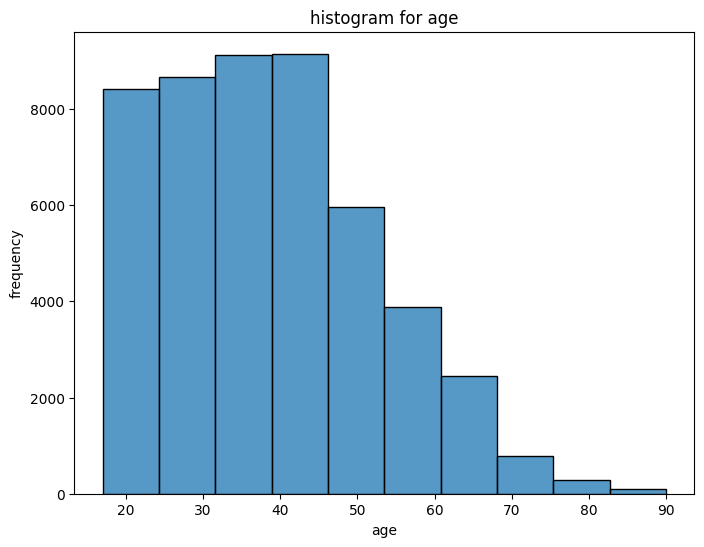

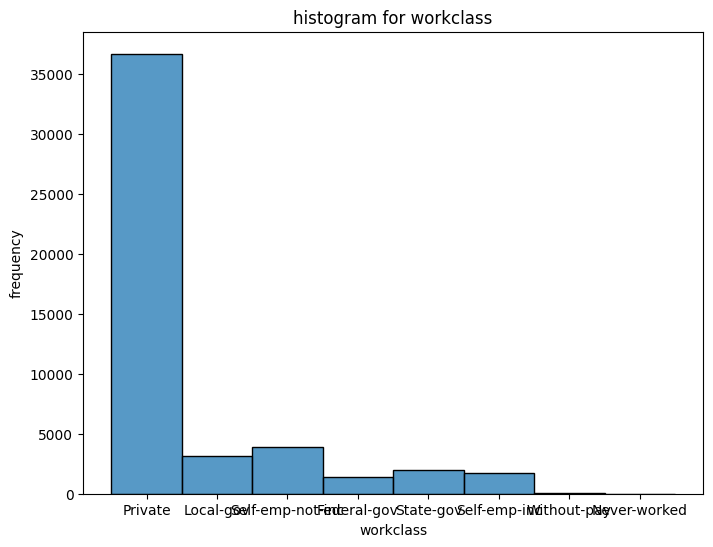

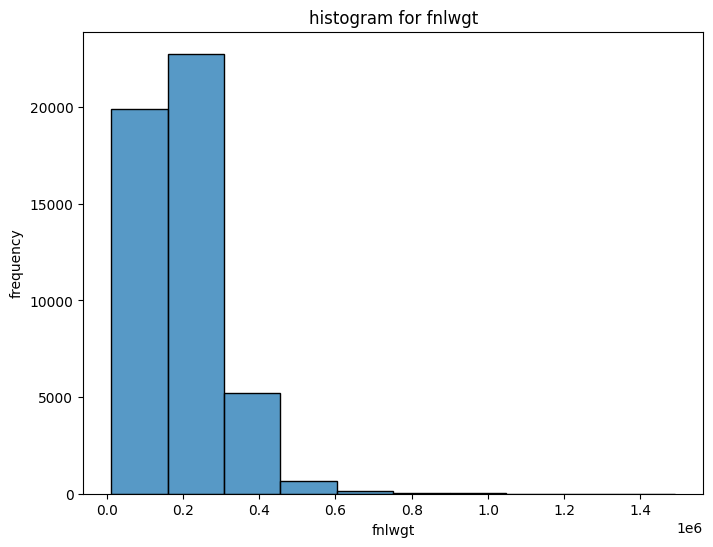

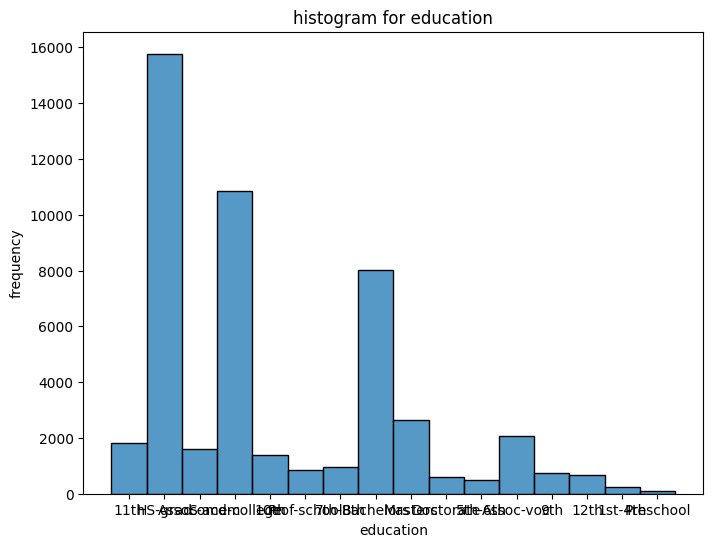

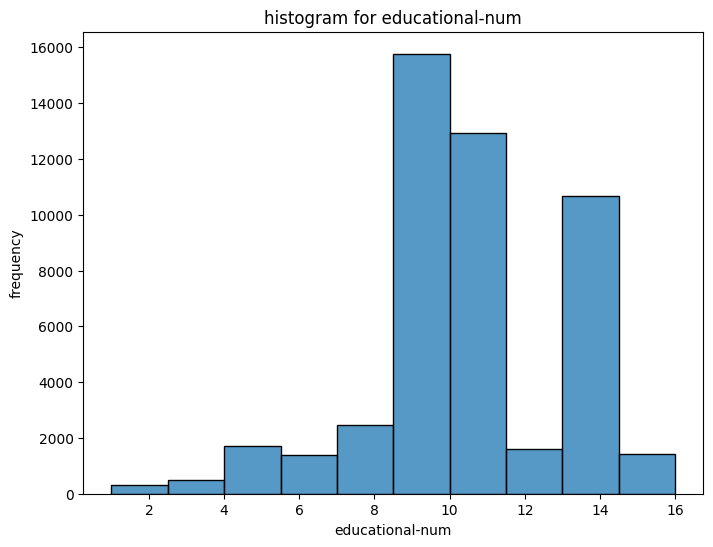

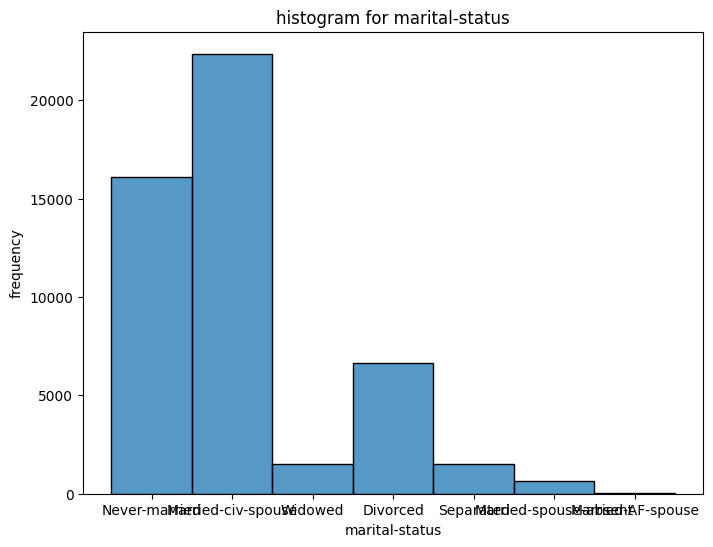

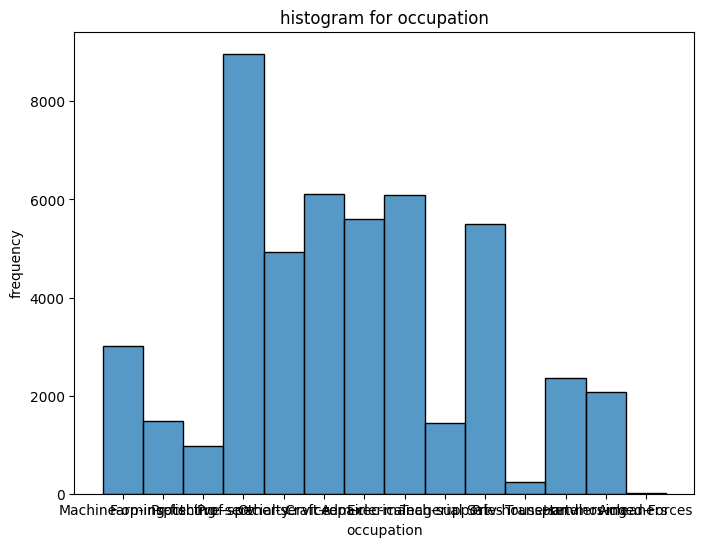

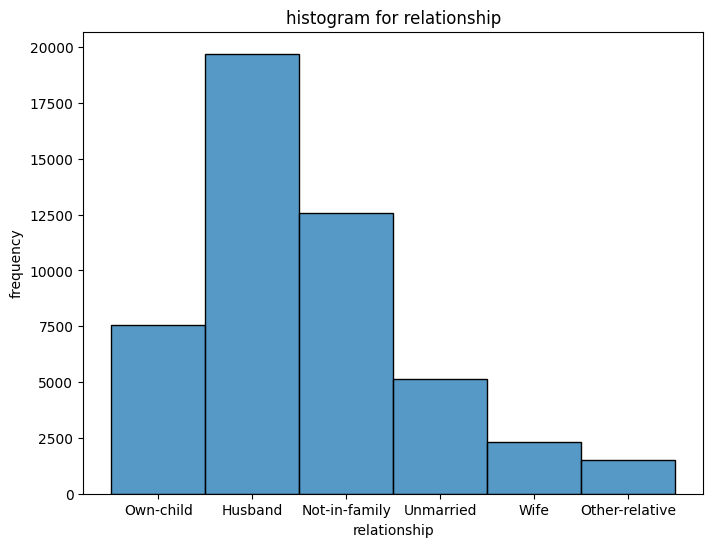

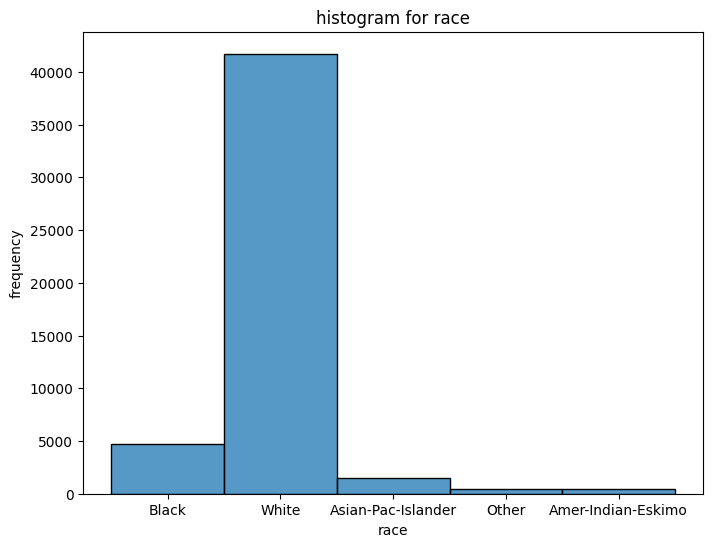

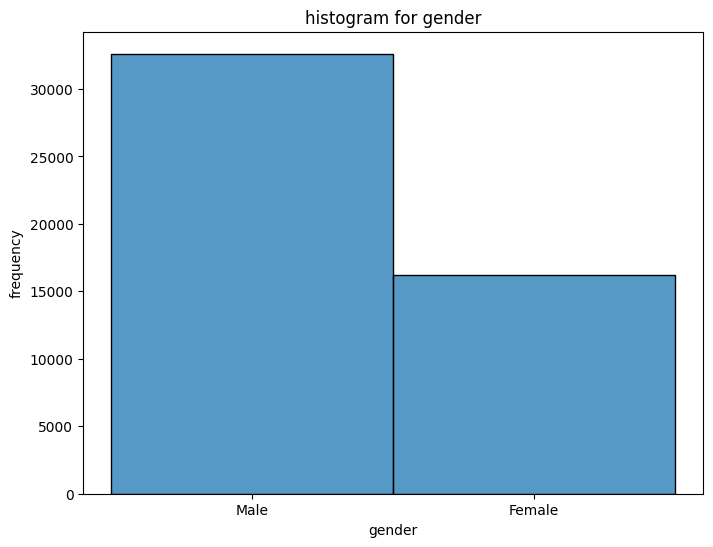

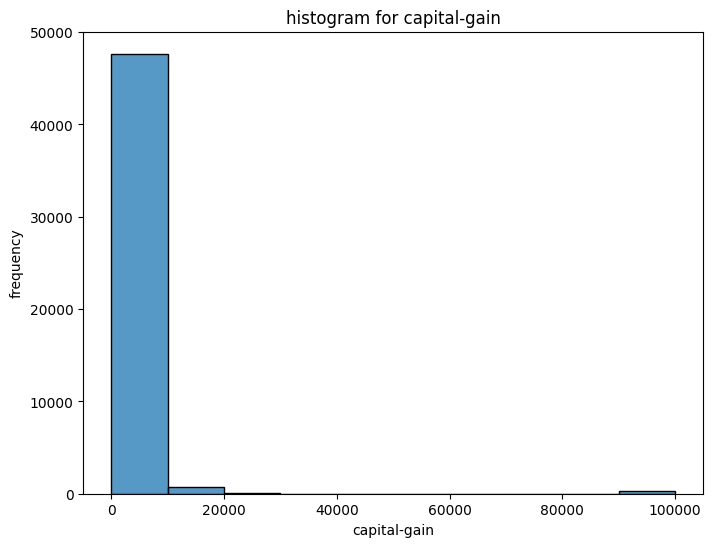

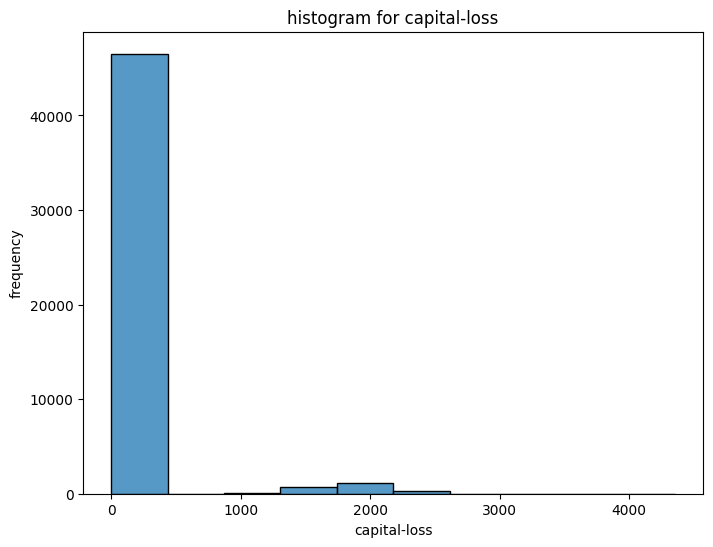

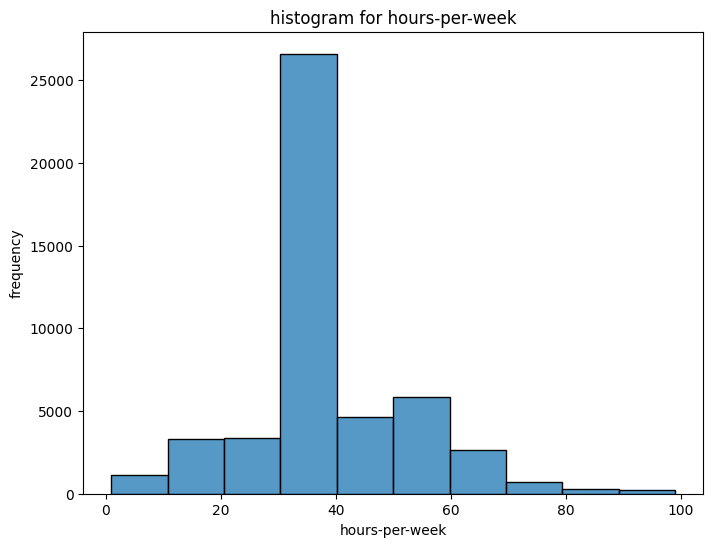

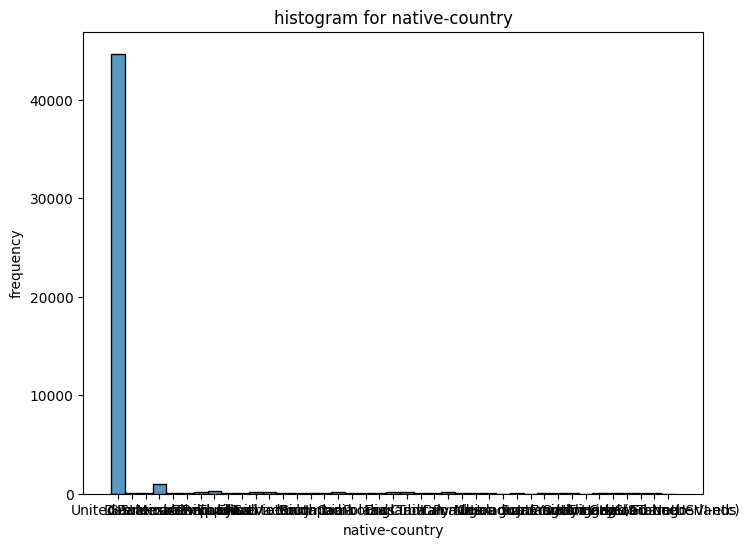

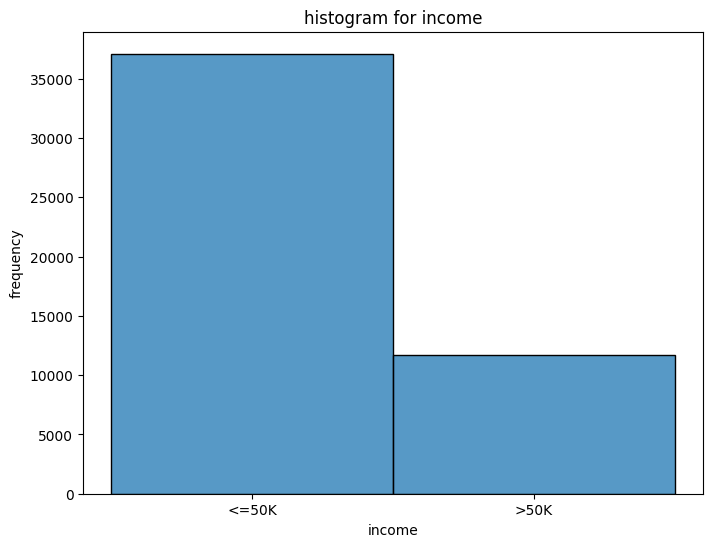

In [20]:
for col in df.columns:
    plt.figure(figsize=(8,6))
    sns.histplot(data=df, x=col, bins=10)
    plt.title(f'histogram for {col}')
    plt.ylabel('frequency')
    plt.show()

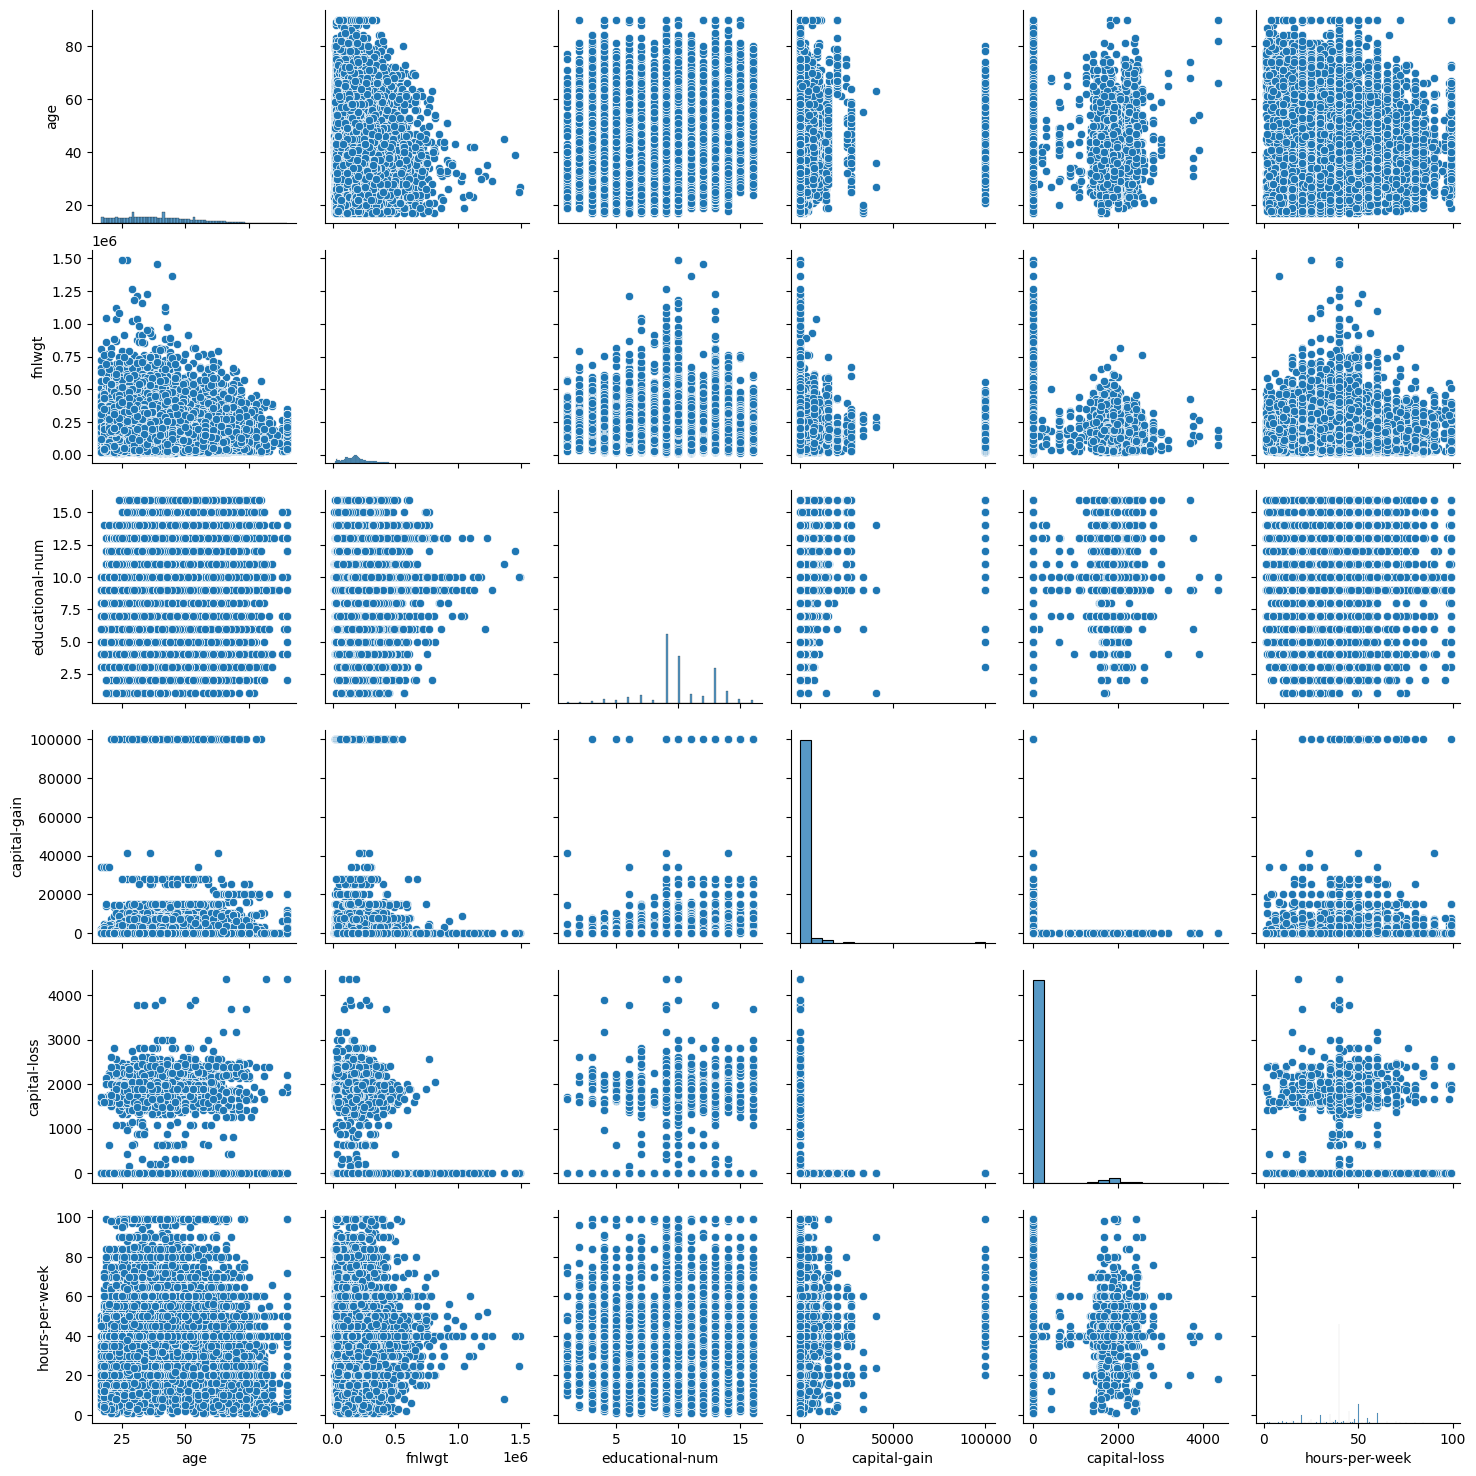

In [21]:
sns.pairplot(df)
    

Finding the outlier for every row using the interquartile range and then imputing it with the mode value`

In [22]:
def findOutlier(col,ub,lb):
    outliers=[]
    for i in df[col]:
        if(i<lb or i>ub):
            outliers.append(i)
    
    print(f"Number of outliers in {col} :",len(outliers))
    unique_outliers=list(set(outliers))
    print(f"Number of unique outliers in {col} :",len(unique_outliers))
    removeOutliers(unique_outliers,col)

The above function uses upper bound and lower bound to find outlier values and input it in a list. That list is reduced and duplicated values in that list is removed by making it a set

In [23]:
def removeOutliers(outliers,col):
    mode_value = df[col].mode()[0]
    for i in outliers:
        df[col]=df[col].replace(to_replace = i, value = mode_value)

from the list of outliers the dataframe is updated by replacing the outlier values with the mode values for the specific column

In [24]:
def findIQR(col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    findOutlier(col,upper_bound,lower_bound)

This function is used to find the inter quartile range and thus the upper and lower bound

In [25]:
for col in numerical_features:
    findIQR(col)

Number of outliers in age : 215
Number of unique outliers in age : 12
Number of outliers in fnlwgt : 1453
Number of unique outliers in fnlwgt : 1151


C:\Users\iamri\AppData\Local\Temp\ipykernel_3804\2601488191.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col]=df[col].replace(to_replace = i, value = mode_value)
C:\Users\iamri\AppData\Local\Temp\ipykernel_3804\2601488191.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col]=df[col].replace(to_replace = i, value = mode_value)


Number of outliers in educational-num : 1787
Number of unique outliers in educational-num : 4
Number of outliers in capital-gain : 4035
Number of unique outliers in capital-gain : 122
Number of outliers in capital-loss : 2282
Number of unique outliers in capital-loss : 98
Number of outliers in hours-per-week : 13486
Number of unique outliers in hours-per-week : 76


C:\Users\iamri\AppData\Local\Temp\ipykernel_3804\2601488191.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col]=df[col].replace(to_replace = i, value = mode_value)
C:\Users\iamri\AppData\Local\Temp\ipykernel_3804\2601488191.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col]=df[col].replace(to_replace = i, value = mode_value)
C:\Users\iamri\AppData\Local\Temp\ipykernel_3804\2601488191.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old beha

This for loop calls the outlier detection and handling functions for all numerical columns

In [26]:
df.shape

(48790, 15)

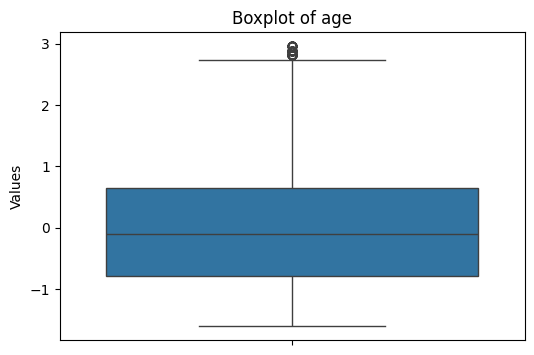

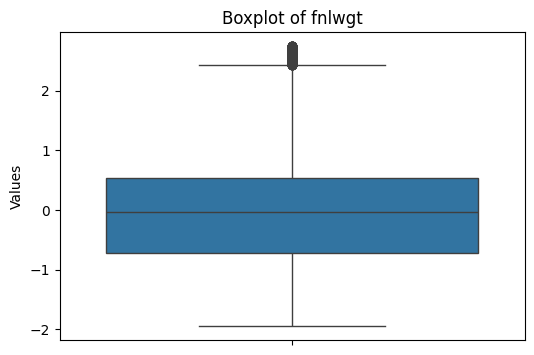

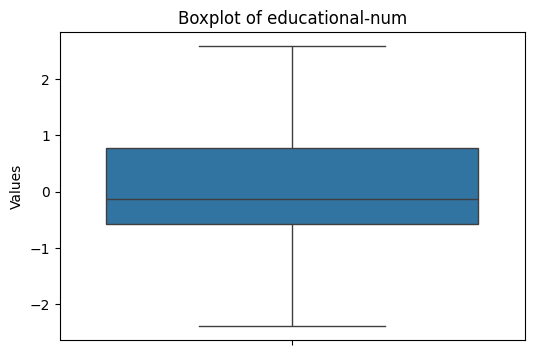

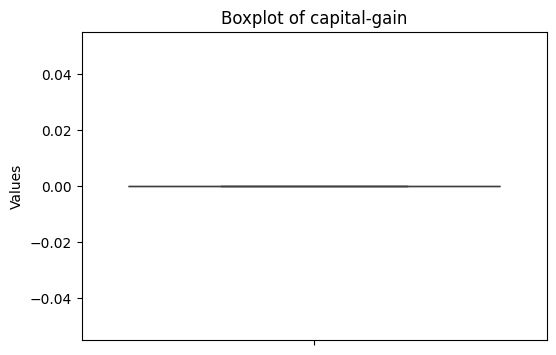

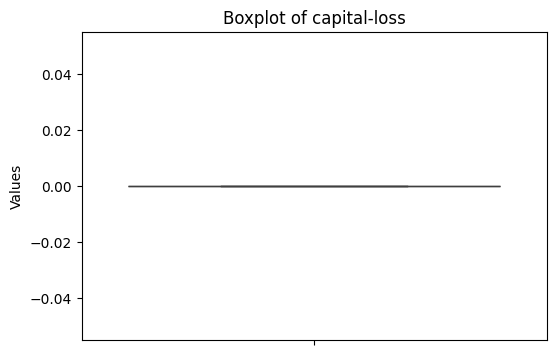

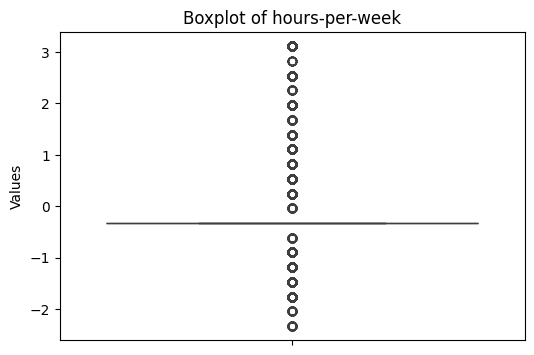

In [35]:
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel('Values')
    plt.show()

In [28]:
df['age'].sort_values().unique()

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78], dtype=int64)

### Data Scaling

Data scaling can be of two types
- Normalization : Min-max scaling (between 0 and 1)
- Standardization : standard deviation scaling (mean is 0)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [31]:
df[numerical_features]=scaler.fit_transform(df[numerical_features])

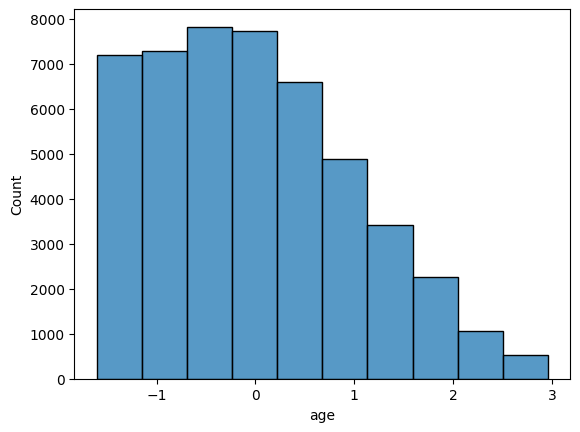

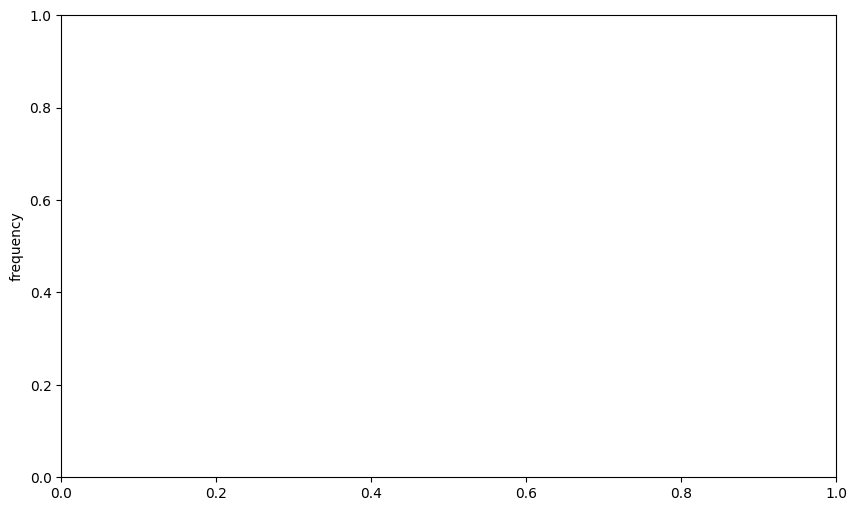

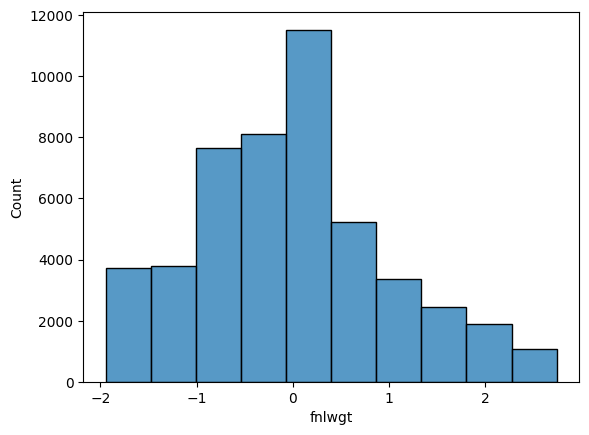

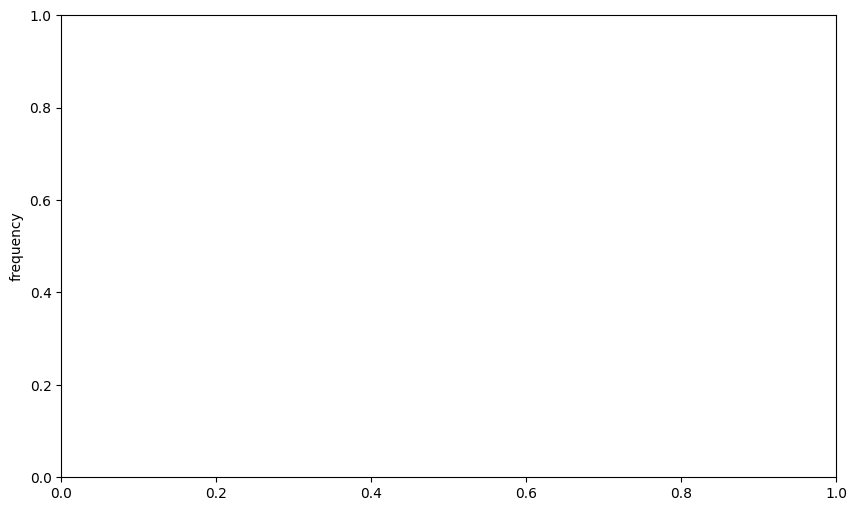

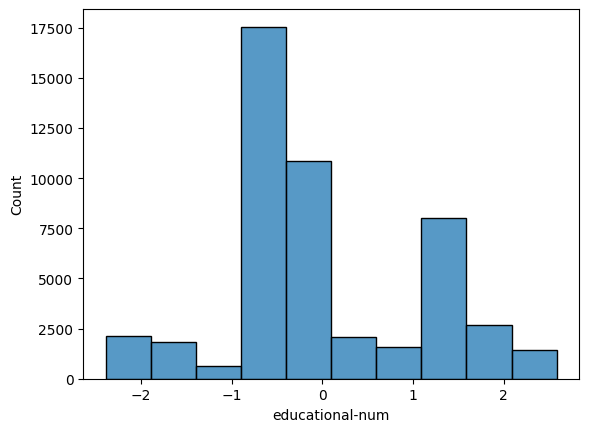

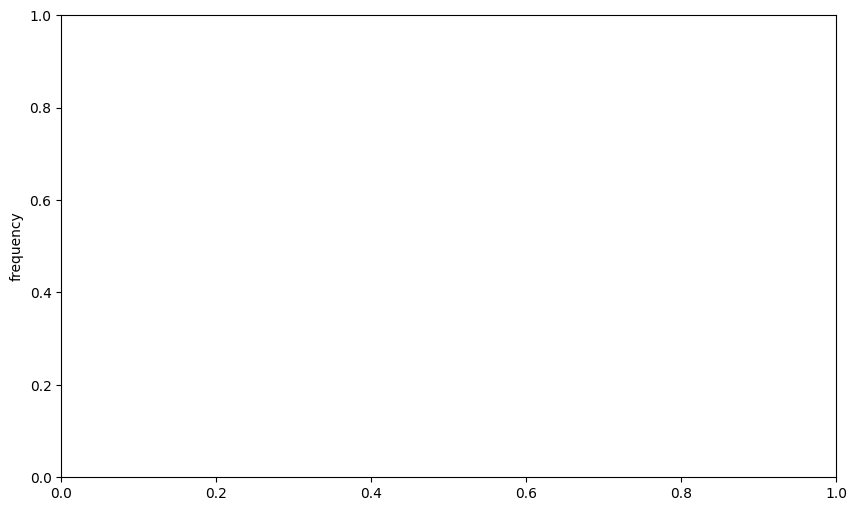

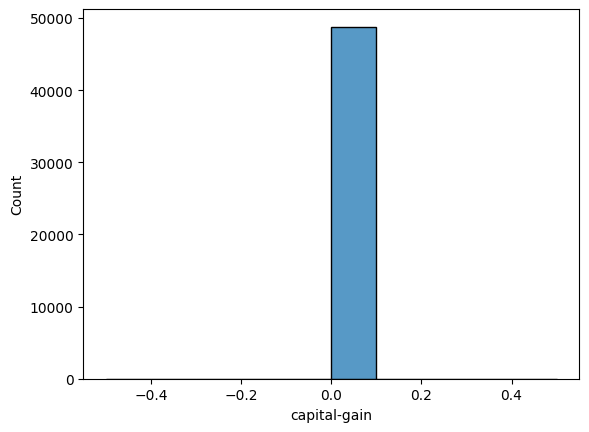

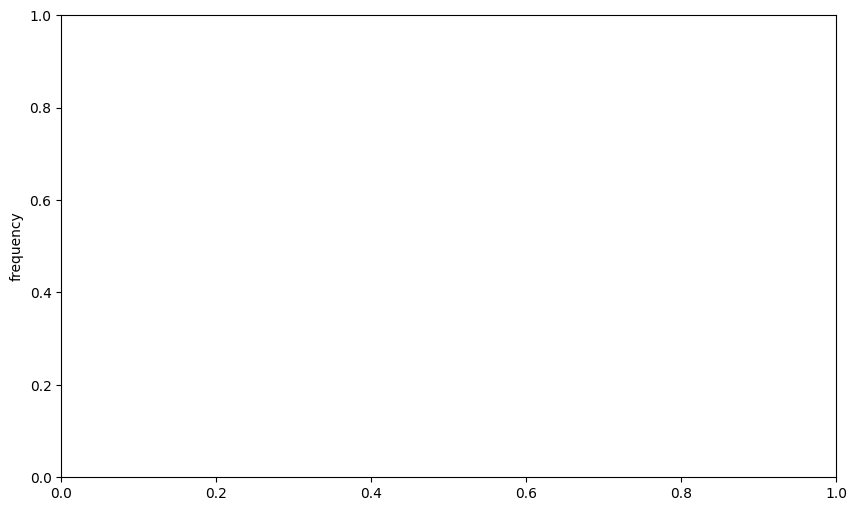

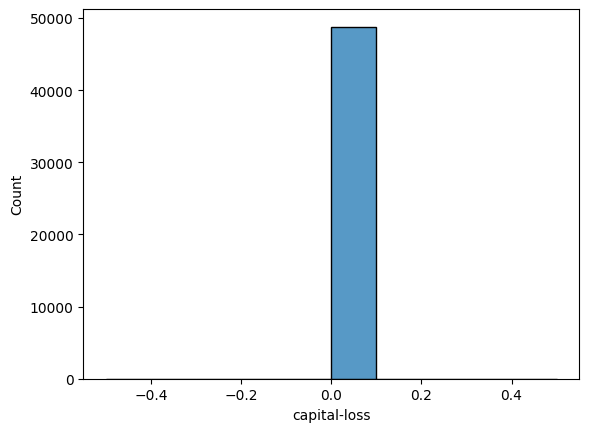

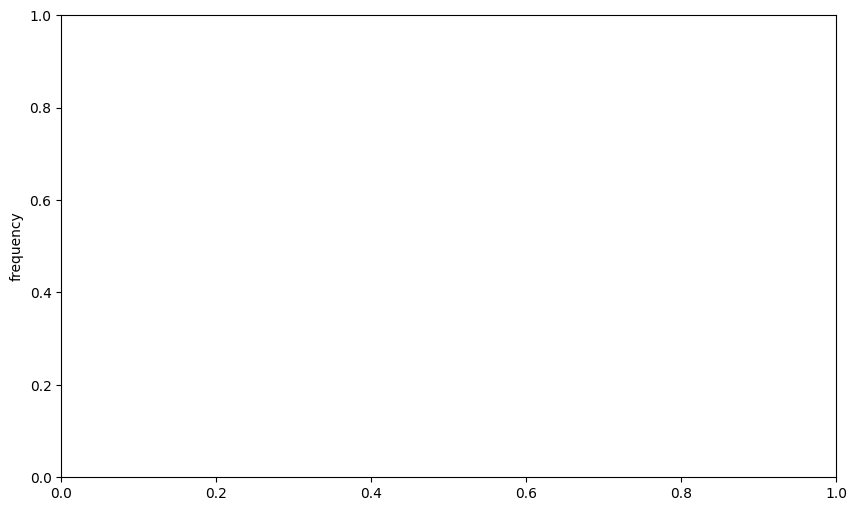

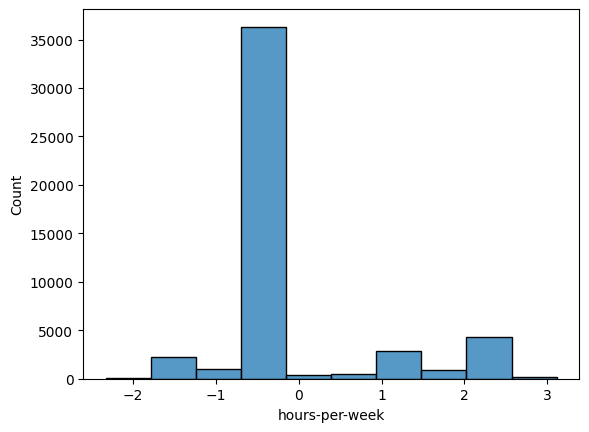

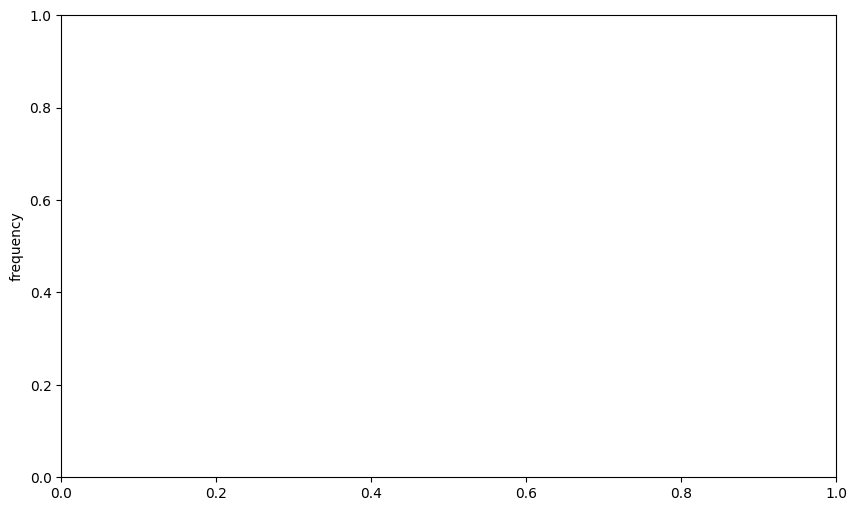

In [37]:
for col in numerical_features:
    sns.histplot(data=df,x=col,bins=10)
    plt.figure(figsize=(10,6))
    plt.ylabel('frequency')
    plt.show()

Thus the data is scaled such that the mean is 0

## Handling categorical data

To convert categorical data (strings) into numerical data
using the following methods
- one hot encoding (0 and 1 across multiple dimensions)
- binary encoding (0 and 1 in a single dimension for binary features)
- numerical encoding (ordinal values)


In [42]:
for col in df.columns:
    print(f'{col}:',df[col].nunique())

age: 62
workclass: 8
fnlwgt: 27372
education: 16
educational-num: 12
marital-status: 7
occupation: 14
relationship: 6
race: 5
gender: 2
capital-gain: 1
capital-loss: 1
hours-per-week: 20
native-country: 41
income: 2


Starting with binary encoding for columns with 2 unique values i.e
- gender
- income

In [44]:
print(df['gender'].unique())
print(df['income'].unique())

[1 0]
['<=50K' '>50K']


In [45]:
df['gender']=df['gender'].replace('Male',1)
df['gender']=df['gender'].replace('Female',0)
df['income']=df['income'].replace('<=50K',0)
df['income']=df['income'].replace('>50K',1)

C:\Users\iamri\AppData\Local\Temp\ipykernel_3804\3732011559.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['income']=df['income'].replace('>50K',1)


In [46]:
print(df['gender'].unique())
print(df['income'].unique())

[1 0]
[0 1]


One hot encoding example for race since it will increase dimensionality by adding 5 columns only

In [48]:
df=pd.get_dummies(df,columns=['race'])

In [49]:
df.shape

(48790, 19)

as you can see now the race column was replaced by 5 columns of unique values of race

In [50]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,native-country,income,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,-1.005015,Private,0.537118,11th,-1.485634,Never-married,Machine-op-inspct,Own-child,1,0.0,0.0,-0.324329,United-States,0,False,False,True,False,False
1,-0.033113,Private,-1.048245,HS-grad,-0.581786,Married-civ-spouse,Farming-fishing,Husband,1,0.0,0.0,2.540677,United-States,0,False,False,False,False,True
2,-0.780730,Local-gov,1.811872,Assoc-acdm,0.773986,Married-civ-spouse,Protective-serv,Husband,1,0.0,0.0,-0.324329,United-States,1,False,False,False,False,True
3,0.415456,Private,-0.232244,Some-college,-0.129862,Married-civ-spouse,Machine-op-inspct,Husband,1,0.0,0.0,-0.324329,United-States,1,False,False,True,False,False
4,-1.528346,Private,-0.889892,Some-college,-0.129862,Never-married,Prof-specialty,Own-child,0,0.0,0.0,-0.324329,United-States,0,False,False,False,False,True


Now for rest of the categorical columns we will perform numerical encoding

In [51]:
categorical_features=df.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'native-country']


In [52]:
from sklearn.preprocessing import LabelEncoder
lbl_encoder=LabelEncoder()

In [53]:
for col in categorical_features:
    df[col]=lbl_encoder.fit_transform(df[col])

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48790 entries, 0 to 48789
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      48790 non-null  float64
 1   workclass                48790 non-null  int32  
 2   fnlwgt                   48790 non-null  float64
 3   education                48790 non-null  int32  
 4   educational-num          48790 non-null  float64
 5   marital-status           48790 non-null  int32  
 6   occupation               48790 non-null  int32  
 7   relationship             48790 non-null  int32  
 8   gender                   48790 non-null  int64  
 9   capital-gain             48790 non-null  float64
 10  capital-loss             48790 non-null  float64
 11  hours-per-week           48790 non-null  float64
 12  native-country           48790 non-null  int32  
 13  income                   48790 non-null  int64  
 14  race_Amer-Indian-Eskim

Now as we can see all the values are numeric in the dataset

## Correlation and feature selection

Finally before sampling we can drop the features that will not provide significant value in the models

In [55]:
df.corr()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,native-country,income,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
age,1.000000,0.044415,-0.067043,-0.011286,0.094818,-0.279316,-0.002135,-0.265419,0.089151,NaN,NaN,0.048450,-0.002910,0.238122,-0.014310,-0.011326,-0.015482,-0.032772,0.030957
workclass,0.044415,1.000000,-0.027998,0.005226,0.015611,-0.020841,0.009878,-0.056085,0.066675,NaN,NaN,0.033022,-0.004872,-0.000508,-0.025842,0.008791,-0.067302,-0.005174,0.060470
fnlwgt,-0.067043,-0.027998,1.000000,-0.016661,-0.018907,0.027716,-0.002882,0.006593,0.023729,NaN,NaN,-0.004360,-0.057711,-0.000468,-0.072191,-0.045615,0.097374,0.011862,-0.042008
education,-0.011286,0.005226,-0.016661,1.000000,0.286213,-0.037449,-0.035220,-0.010861,-0.027120,NaN,NaN,0.030245,0.074955,0.080118,-0.002835,0.012316,-0.023914,-0.028005,0.021945
educational-num,0.094818,0.015611,-0.018907,0.286213,1.000000,-0.071445,0.085975,-0.120578,0.026842,NaN,NaN,0.127621,0.009068,0.345291,-0.030826,0.077172,-0.087061,-0.023214,0.049329
marital-status,-0.279316,-0.020841,0.027716,-0.037449,-0.071445,1.000000,0.030372,0.187770,-0.127505,NaN,NaN,-0.090612,-0.017541,-0.198855,-0.000208,0.017807,0.082763,0.015122,-0.081854
occupation,-0.002135,0.009878,-0.002882,-0.035220,0.085975,0.030372,1.000000,-0.035054,0.042773,NaN,NaN,0.019646,-0.001643,0.032533,-0.003339,0.010564,-0.000105,0.002539,-0.004848
relationship,-0.265419,-0.056085,0.006593,-0.010861,-0.120578,0.187770,-0.035054,1.000000,-0.579955,NaN,NaN,-0.164637,-0.007092,-0.253175,0.026655,0.011735,0.137471,0.016184,-0.132352
gender,0.089151,0.066675,0.023729,-0.027120,0.026842,-0.127505,0.042773,-0.579955,1.000000,NaN,NaN,0.158561,-0.002544,0.214639,-0.013004,-0.003524,-0.111646,-0.009774,0.101261
capital-gain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


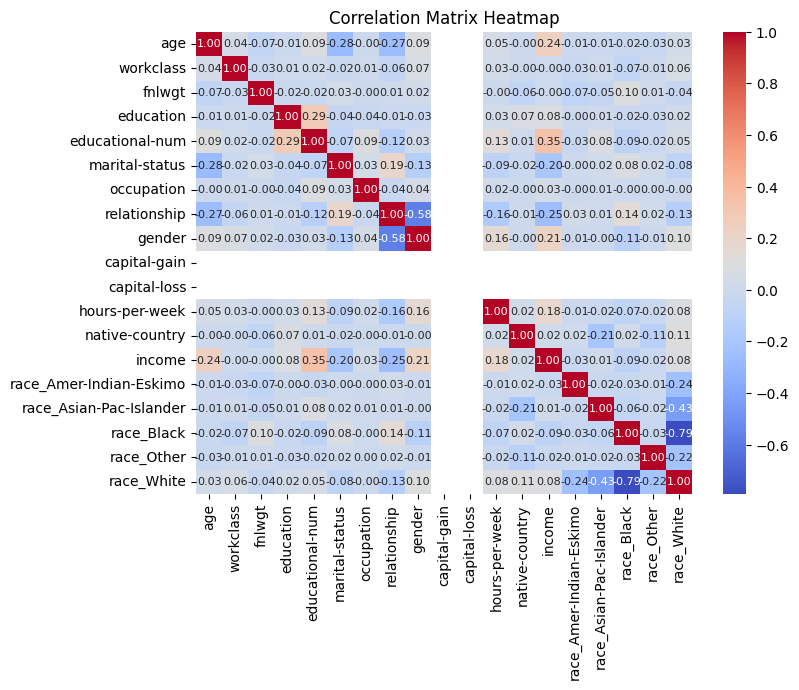

In [58]:
correlation =df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Matrix Heatmap')
plt.show()

thus we can remove columns capital-gain, capital-loss, workclass and fnlwgt

In [59]:
df=df.drop(columns=['capital-gain','capital-loss','workclass','fnlwgt'])

In [60]:
df.shape

(48790, 15)

## Data Sampling

finally we will sample the data to ensure our training set contains a variety of examples based on output feature income

In [61]:
df['income'].value_counts()

income
0    37109
1    11681
Name: count, dtype: int64

We can see the distribution of positive and negative cases is uneven, so we can make the dataset have even number of samples

In [62]:
lt_fifty_k=df[df['income']==0]
gt_fifty_k=df[df['income']==1]

Now to make it even from 37109 we randomly choose 11681 for lesser than fifty

In [63]:
sample=lt_fifty_k.sample(n=11681)

and now we use this and greater than fifty examples to create a new dataframe

In [65]:
sampled_df=pd.concat([sample,gt_fifty_k],axis=0)

In [66]:
sampled_df

,age,education,educational-num,marital-status,occupation,relationship,gender,hours-per-week,native-country,income,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
27828,-0.631206,10,2.581681,4,9,3,1,-0.324329,38,0,False,False,False,False,True
11705,1.910689,11,-0.581786,6,7,2,1,-0.324329,38,0,False,False,False,False,True
22887,0.340695,15,-0.129862,5,11,4,0,-0.324329,38,0,False,False,False,False,True
19180,1.088311,1,-1.485634,0,7,4,0,-0.324329,38,0,False,False,False,False,True
36069,0.490218,7,0.773986,0,0,4,1,-1.756832,38,0,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48768,2.434021,10,2.581681,2,9,0,1,-0.324329,38,1,False,False,False,False,True
48774,0.041648,7,0.773986,2,0,5,0,-0.324329,38,1,False,False,False,False,True
48783,1.088311,12,1.677833,2,3,0,1,-0.324329,38,1,False,False,False,False,True
48786,0.116410,11,-0.581786,2,6,0,1,-0.324329,38,1,False,False,False,False,True


### Splitting data for training and testing

Our label feature is income so we split on it's basis

In [69]:
X = sampled_df.drop('income',axis=1)
y = sampled_df['income']

In [70]:
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (23362, 14)
Shape of y:  (23362,)


Further for feature selection we can compare the correlation of X with y again

In [71]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X, y)
mutual_info

array([0.10334428, 0.08709607, 0.08657991, 0.15617216, 0.07209614,
       0.16405297, 0.04261262, 0.02127789, 0.0096879 , 0.00083878,
       0.        , 0.00795616, 0.        , 0.0054583 ])

In [72]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

relationship               0.164053
marital-status             0.156172
age                        0.103344
education                  0.087096
educational-num            0.086580
occupation                 0.072096
gender                     0.042613
hours-per-week             0.021278
native-country             0.009688
race_Black                 0.007956
race_White                 0.005458
race_Amer-Indian-Eskimo    0.000839
race_Asian-Pac-Islander    0.000000
race_Other                 0.000000
dtype: float64

Here we can see that relationship provides most information in the given dataset with respect to the income

<Axes: >

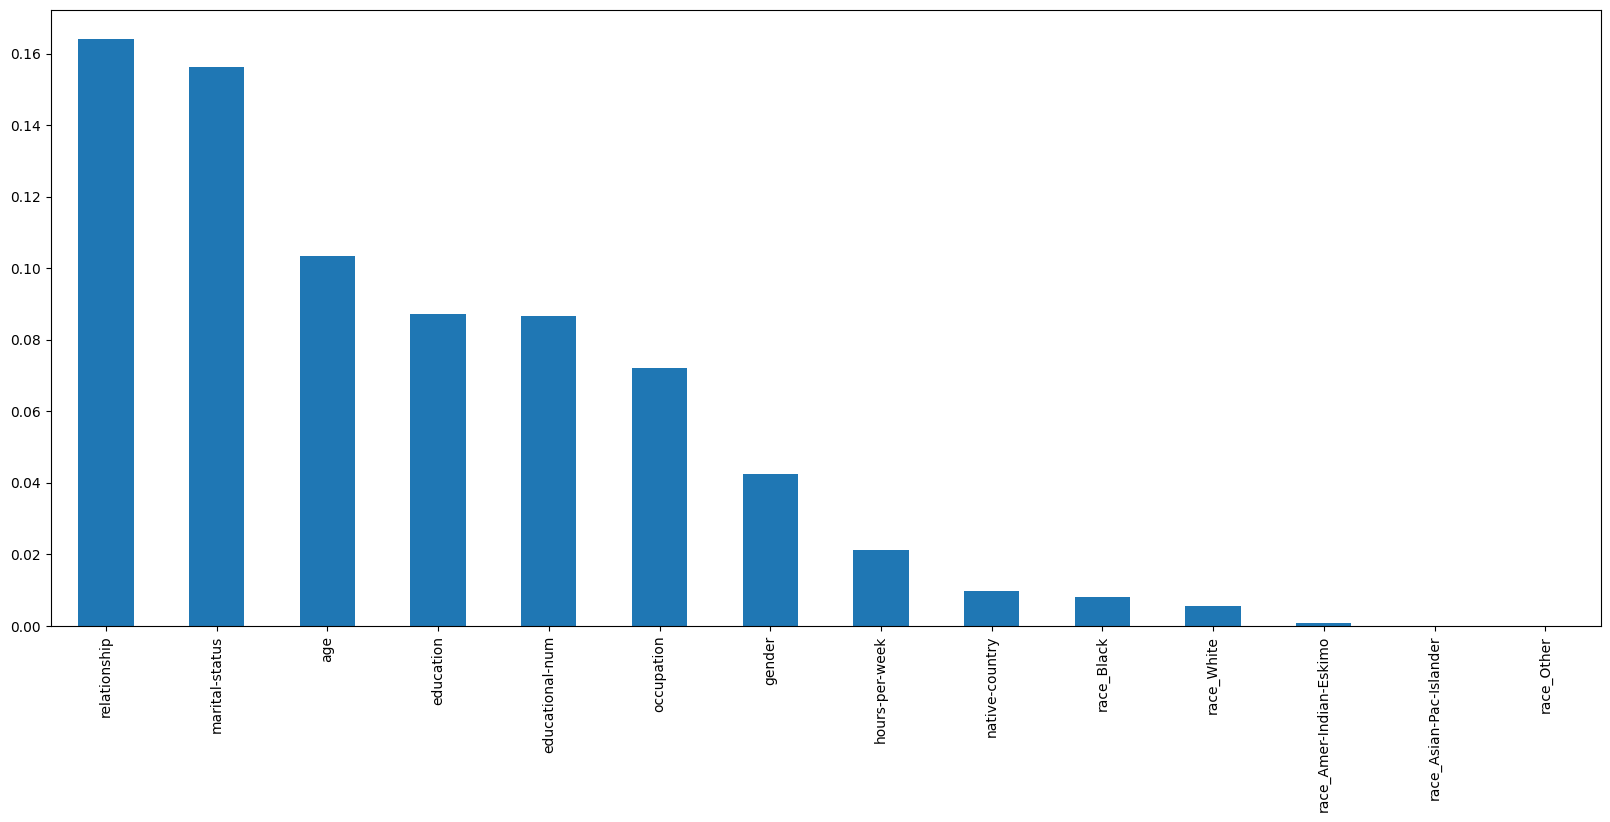

In [73]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Finall splitting into training and testing data with the ratio of 70:30

In [80]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True)

In [81]:
print('X_Training Shape: ', X_train.shape)
print('X_Testing Shape: ', X_test.shape)
print('Y_Training Shape: ', y_train.shape)
print('Y_Testing Shape: ', y_test.shape)

X_Training Shape:  (16353, 14)
X_Testing Shape:  (7009, 14)
Y_Training Shape:  (16353,)
Y_Testing Shape:  (7009,)


The data preprocessing is completed